# <center>**Classification of Diabetes**</center></h1>
## <center>Data intensive application programming project - 2022/2023</center></h2>
### <center>Salvatore Antonio Addimando <br/> salvatore.addimando@studio.unibo.it <br/> ID: 970539 <br/> <br/> Benedetta Pacilli <br/> benedetta.pacilli@studio.unibo.it <br/> ID: 975296 </center></h3>


### Libraries import

First of all, we import the libraries to perform operations on data
+ NumPy to create and operate on N-dimensional arrays
+ pandas to load and manipulate in tabular format

In [1]:
import numpy as np
import pandas as pd

Other libraries will be imported later, when needed.

### Data import
The dataset used for this project is the [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) from Kaggle. It is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The dataset is composed of 100,000 rows and 9 columns, each row representing a patient and each column a medical feature of the patient, except for the target feature. The features are the following:

+ **Age**: the age of the patient in years
+ **Gender**: Female, Male or Other
+ **BMI**: Body Mass Index
+ **Hypertention**: a medical condition in which the blood pressure in the arteries is persistently elevated, the column specifies if the patient has hypertension or not
+ **Heart Disease**: a medical condition in which the heart's ability to pump blood is reduced, the column specifies if the patient has heart disease or not
+ **Smoking History**: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated. It can take the following values:
    + **never**
    + **ever**
    + **former**
    + **current**
    + **not current**
    + **No Info**
+ **HbA1c level**: measure of a person's average blood sugar level over the past 2-3 months.
+ **Blood Glucose Level**: the concentration of glucose present in the blood of a patient
+ **Diabets**: the target column, it specifies if the patient has diabetes or not

The variable we want to predict is the last one, **Diabetes**. It is a binary variable, so we are dealing with a binary classification problem.

Now we can load the dataset. To load the dataset we need to import the os library to get the path of the dataset and the kaggle library to download the dataset directly from Kaggle. Pandas is used to read the dataset file.

In [3]:
import os.path as os
import kaggle

if not os.exists("diabetes_prediction_dataset.csv"):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        'iammustafatz/diabetes-prediction-dataset', path='.', unzip=True)
dataset = pd.read_csv('diabetes_prediction_dataset.csv')

We now show some more information about the dataset by using the pandas functions `info()` and `head()`.

In [4]:
dataset.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 9 entries, gender to diabetes
dtypes: float64(3), int64(4), object(2)
memory usage: 17.3 MB


In [5]:
dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Data manipulation and analysis
We now perform some operations on the dataset to better understand it and to prepare it for analysis. First, we check if there are any missing values in the dataset.

In [6]:
if dataset.isnull().values.any():
    print("Missing values found")
    # Removing missing values
    dataset = dataset.dropna()
    print("Missing values removed")
else:
    print("No missing values found")

No missing values found


We can see that there are no missing values in the dataset, so we can proceed with the analysis. We now check the type of each variable in the dataset.

In [7]:
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

All variables already have compatible data types.

In our model we want to only include the variables that have an impact on the prediction. To do so we create *n* plots (*n* = numbers of variables - diabetes), each one showing the relationship between the *n<sup>th</sup>* variable (on the x axis) and diabetes (on the y axis).

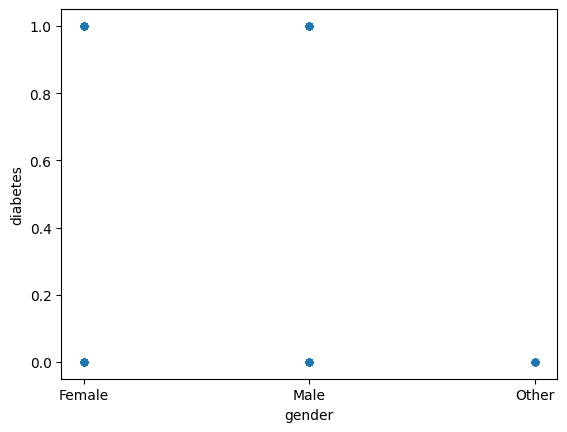

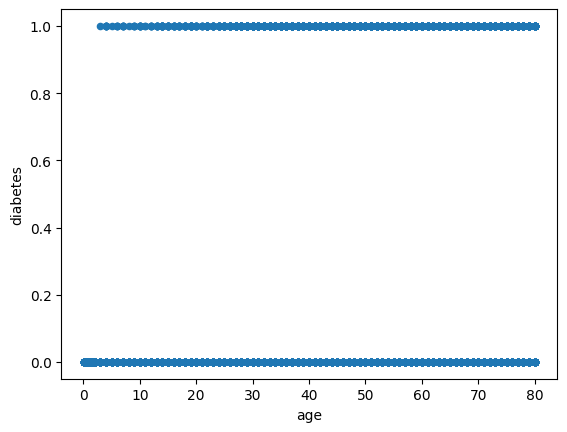

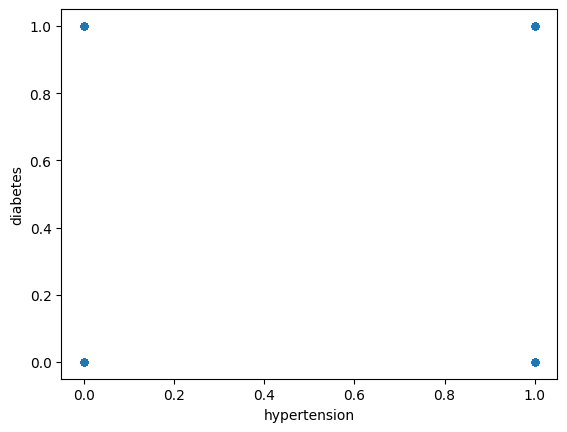

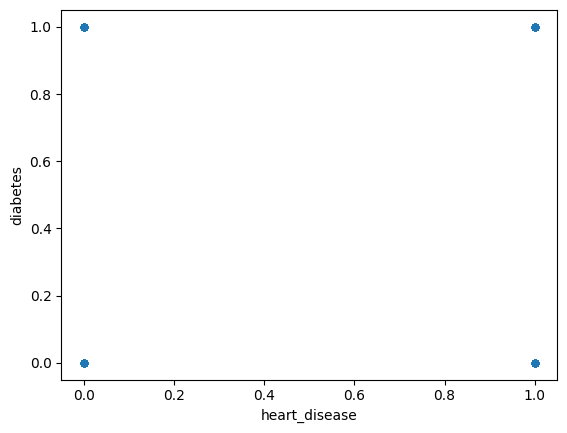

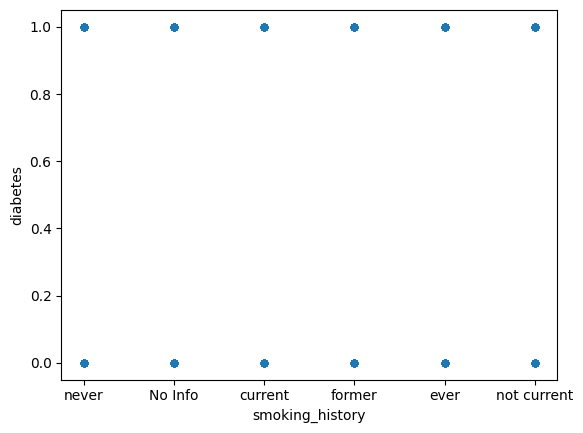

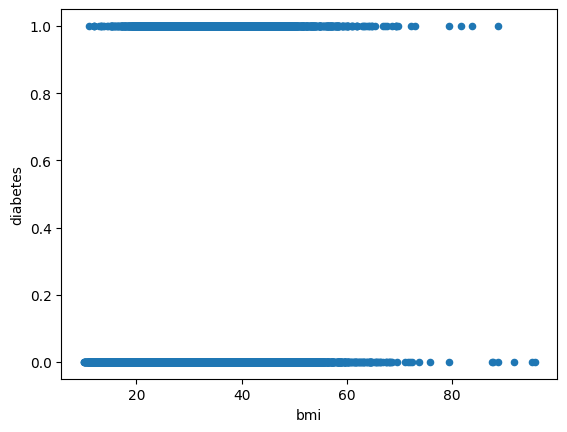

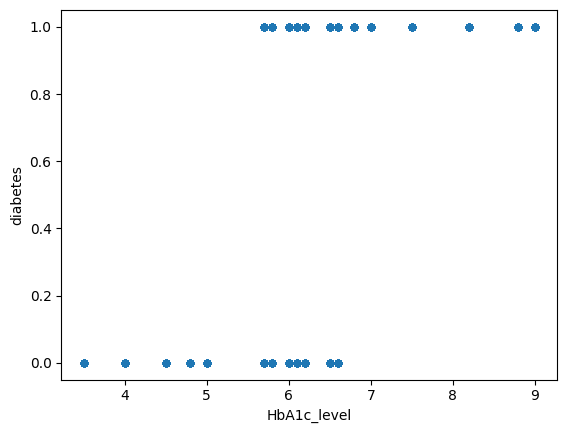

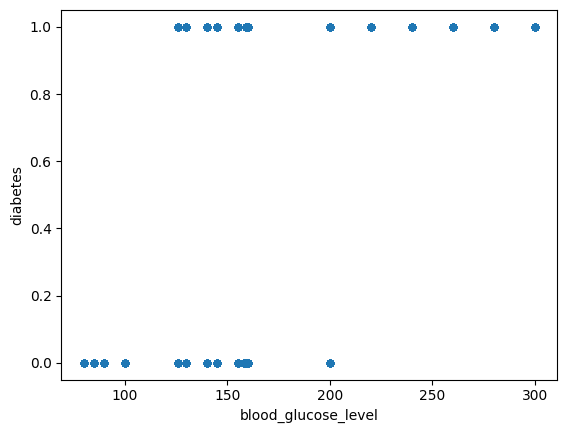

In [8]:
import matplotlib.pyplot as plt

for column in dataset.columns.drop('diabetes'):
    dataset.plot.scatter(x=column, y='diabetes').get_figure()

We reckon that all variables have an impact on the prediction, so we will include all of them in the model. We can also see, from the last two plots, that with HbA1c and blood glucose level there is a transition point where the probability of having diabetes switches from 0 to 1.

We now report some statistics and graphs about the variables:

In [9]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000
